In [29]:
import numpy as np
import pandas as pd
from pair_trading_foundations.utils import examine_output_data
import pickle

## Load the generated file (Feature + Label + Metadata Combined)

In [30]:
with open('Data/spotcheckout_output.pkl','rb') as file:
    sample_output = pickle.load(file)

In [31]:
sample_output[['Ticker_P1','Ticker_P2']].drop_duplicates().shape

(45, 2)

In [32]:
tb = sample_output.drop('trade_executions', axis=1).dropna().reset_index(drop=True)
tb.pnls.describe()

count    6435.000000
mean       -0.001692
std         0.039453
min        -0.172123
25%         0.000000
50%         0.000000
75%         0.000000
max         0.182408
Name: pnls, dtype: float64

## Sampling any pnl that is not 0 and examine

In [33]:
sample_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56655 entries, 0 to 56654
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       56655 non-null  object 
 1   Ticker_P1                  56655 non-null  object 
 2   Close_P1                   56655 non-null  float64
 3   Ticker_P2                  56655 non-null  object 
 4   Close_P2                   56655 non-null  float64
 5   High_P1                    56655 non-null  float64
 6   High_P2                    56655 non-null  float64
 7   Low_P1                     56655 non-null  float64
 8   Low_P2                     56655 non-null  float64
 9   Volume_P1                  56655 non-null  float64
 10  Volume_P2                  56655 non-null  float64
 11  abs_spread                 56655 non-null  float64
 12  abs_spread_mean            34200 non-null  float64
 13  abs_spread_std             34200 non-null  flo

In [34]:
# sample 
sampled_record = sample_output[sample_output.pnls>0].sample(1)

# sampled_record = sample_output[sample_output.pnls==sample_output.pnls.max()]
sampled_record

,Date,Ticker_P1,Close_P1,Ticker_P2,Close_P2,High_P1,High_P2,Low_P1,Low_P2,Volume_P1,...,abs_spread_normed_90th,abs_spread_normed_75th,abs_spread_normed_median,abs_spread_normed_l7_avg,abs_spread_normed_l14_avg,cos_sim,corr_coef,pnls,num_entries,trade_executions
38664,2022-07-20,MOS,46.544308,SLB,33.037483,48.23,34.25,47.200001,33.259998,3592100.0,...,NaN,NaN,NaN,0.89571,0.777958,0.986164,0.920563,0.157948,1.0,exit_idx entry_idx stock1_price_entry st...


## Visualize the data for spotchecking

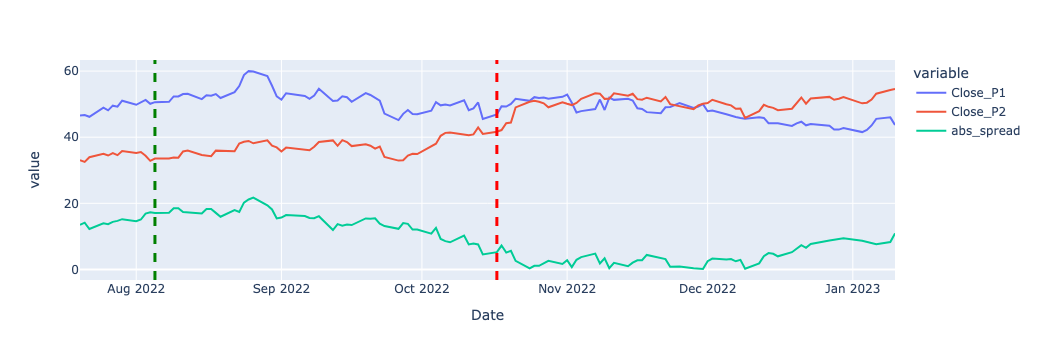

In [35]:
examine_output_data(
    tb=sample_output,
    ticker1=sampled_record.Ticker_P1.values[0],
    ticker2=sampled_record.Ticker_P2.values[0],
    date=sampled_record.Date.values[0]
)

In [36]:
## Display the trade execution details

In [37]:
sampled_record.trade_executions.values[0]

,exit_idx,entry_idx,stock1_price_entry,stock1_price_exit,stock2_price_entry,stock2_price_exit,long_stock_1,pnl,entry_dates,exit_dates
0,61,11,50.604702,46.880138,33.540695,41.667423,False,15.794785,2022-08-05,2022-10-17


# Challenges

1. There are 119316 stock pairs. It takes ~45 mins to generate the training data for 1000 pairs and hence the runtime could be an issue.
3. The basic features are weak predictors therefore we need to invest more time in feature engineering
4. Lots of zeros in the label is creating an imbalanced problem. (e.g. 60% in the sample output)